# Plot the 1,5,10,20 year performance of sector index compared to broad market index

In [2]:
# Define a list of ETF
# Define the ETFs we want to analyze
etf_list = [
    # Broad Market Indices
    ("SPY", "SPDR S&P 500 ETF"),
    # Sector ETFs
    ("XLE", "Energy Select Sector SPDR"),
    ("XLK", "Technology Select Sector SPDR"),
    ("XLF", "Financial Select Sector SPDR"),
    ("XLV", "Health Care Select Sector SPDR"),
    # Add more sector ETFs as needed
]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


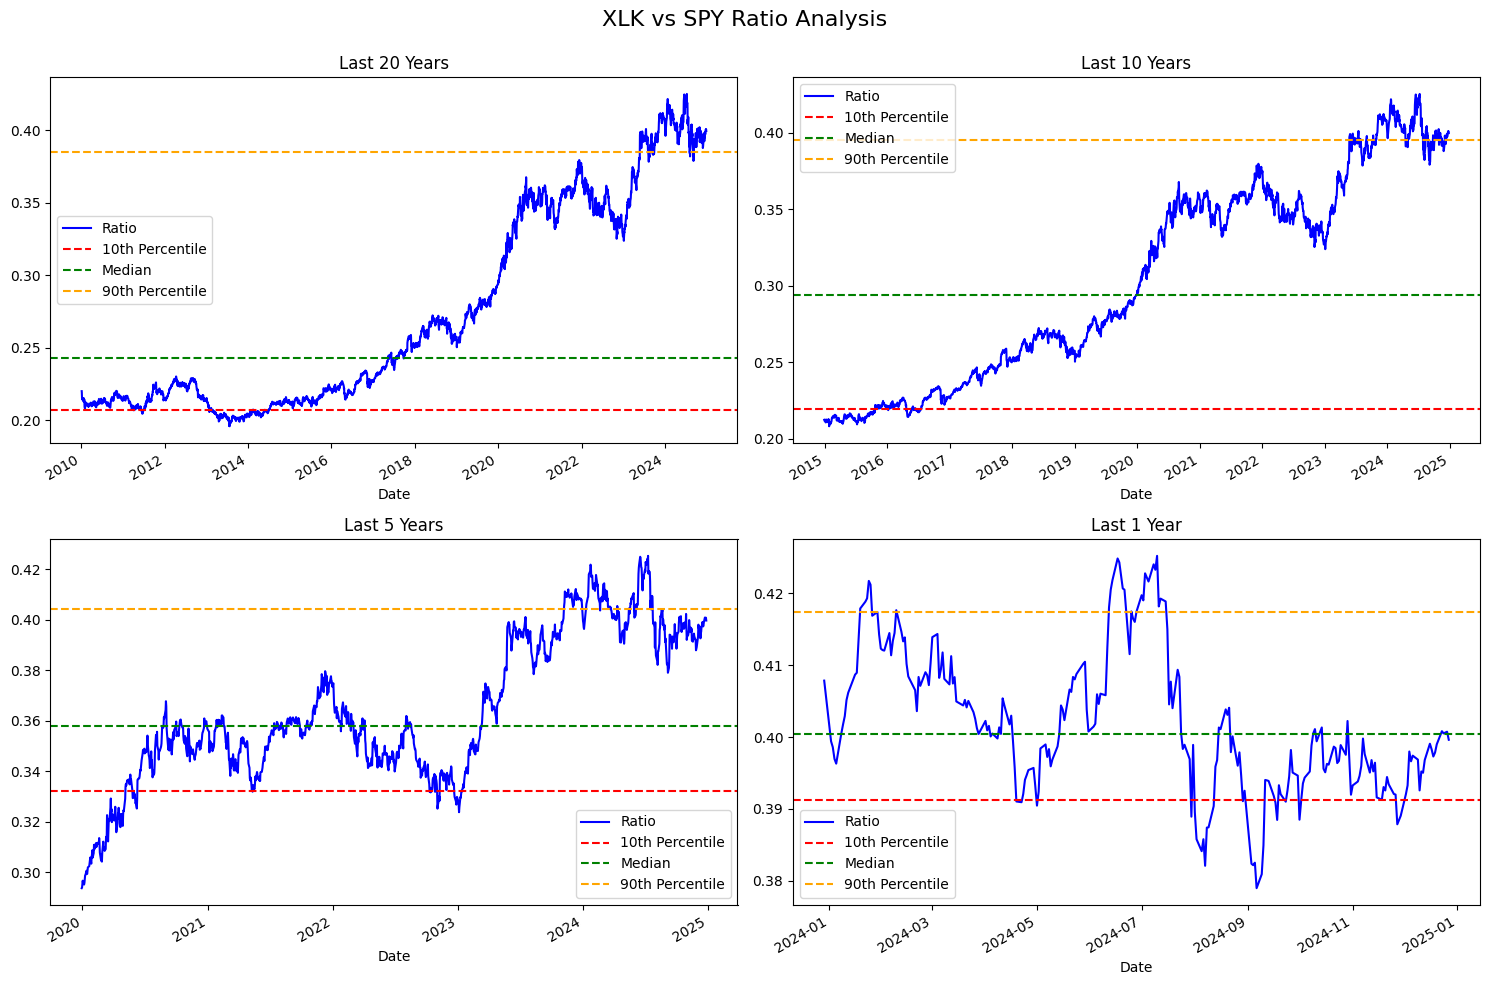

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def fetch_and_align_data(ticker1, ticker2, start_date, end_date):
    """Fetch and align data for two tickers"""
    try:
        data1 = yf.download(ticker1, start=start_date, end=end_date)
        data2 = yf.download(ticker2, start=start_date, end=end_date)

        if data1.empty or data2.empty:
            return pd.DataFrame()

        aligned = pd.concat([data1['Close'], data2['Close']], axis=1, join='inner')
        aligned.columns = ['ticker1', 'ticker2']
        aligned['ratio'] = aligned['ticker1'] / aligned['ticker2']
        return aligned
    except Exception as e:
        print(f"Error: {e}")
        return pd.DataFrame()

def plot_ratio_analysis(ticker1, ticker2, start_date, end_date):
    """Create a 2x2 subplot showing ratio analysis over different timeframes"""
    timeframes = [
        ("Last 20 Years", 20),
        ("Last 10 Years", 10),
        ("Last 5 Years", 5),
        ("Last 1 Year", 1)
    ]

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    actual_end = datetime.strptime(end_date, "%Y-%m-%d")

    for i, (label, yrs) in enumerate(timeframes):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        # Calculate start date for this timeframe
        sub_start = (actual_end - timedelta(days=365.25 * yrs)).strftime("%Y-%m-%d")
        sub_start = max(sub_start, start_date)

        # Get and plot data
        df = fetch_and_align_data(ticker1, ticker2, sub_start, end_date)
        if not df.empty:
            # Calculate quantiles
            q10 = df['ratio'].quantile(0.10)
            q50 = df['ratio'].quantile(0.50)
            q90 = df['ratio'].quantile(0.90)

            # Plot
            df['ratio'].plot(ax=ax, label='Ratio', color='blue')
            ax.axhline(q10, color='red', linestyle='--', label='10th Percentile')
            ax.axhline(q50, color='green', linestyle='--', label='Median')
            ax.axhline(q90, color='orange', linestyle='--', label='90th Percentile')

            ax.set_title(f"{label}")
            ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    fig.suptitle(f"{ticker1} vs {ticker2} Ratio Analysis", fontsize=16)
    plt.show()

# Example usage
start_date = "2010-01-01"
end_date = "2024-12-29"

# Compare a sector ETF against SPY
ticker1 = "XLK"  # Technology Sector
ticker2 = "SPY"  # S&P 500
plot_ratio_analysis(ticker1, ticker2, start_date, end_date)

# Ratio of Sector ETF's to SPY (20 year period)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SPY data points: 5283


XLE data points: 5283


[*********************100%***********************]  1 of 1 completed


XLK data points: 5283


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

XLF data points: 5283
XLV data points: 5283


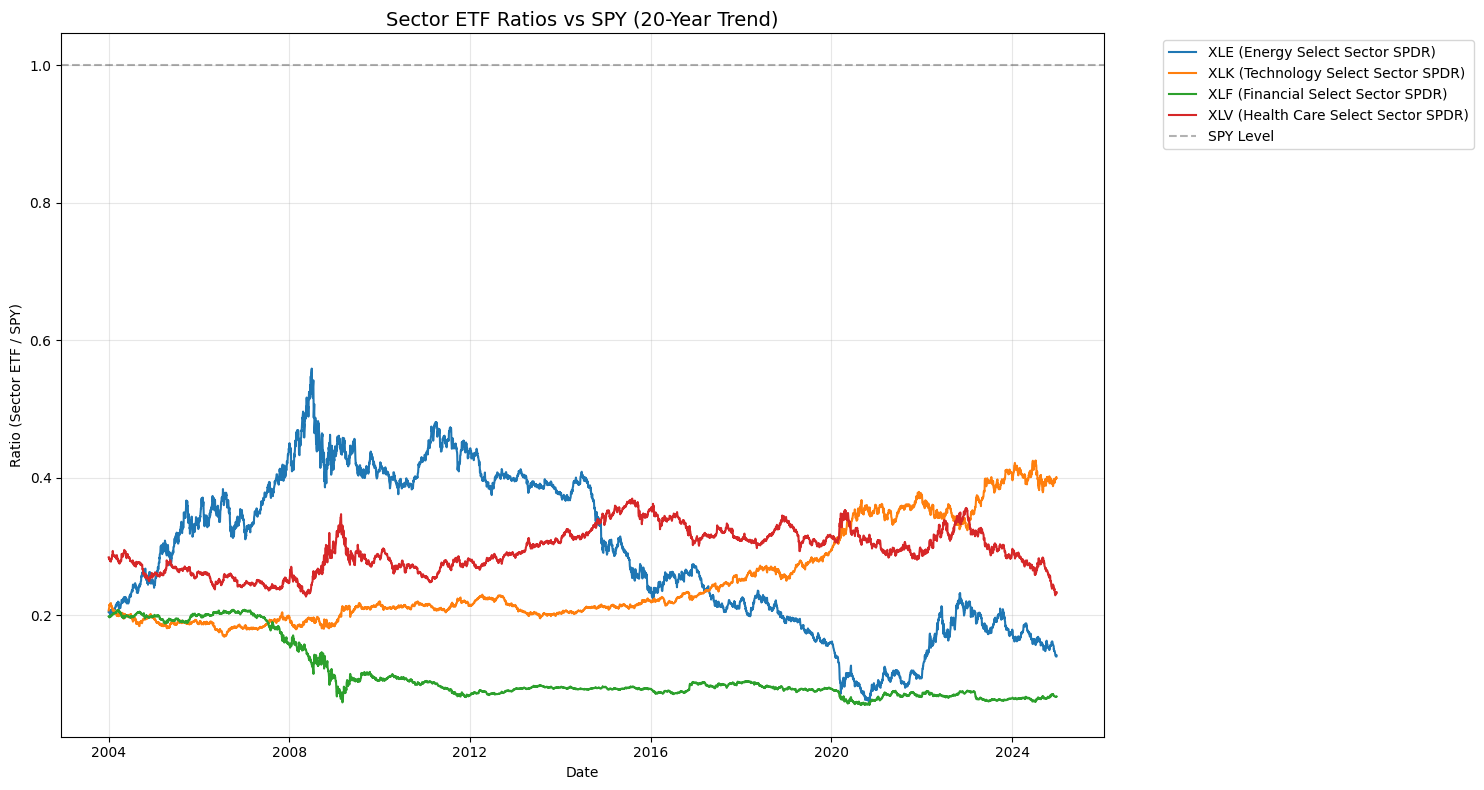

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

etf_list = [
    ("SPY", "SPDR S&P 500 ETF"),
    ("XLE", "Energy Select Sector SPDR"),
    ("XLK", "Technology Select Sector SPDR"),
    ("XLF", "Financial Select Sector SPDR"),
    ("XLV", "Health Care Select Sector SPDR"),
]

start_date = "2004-01-01"
end_date = "2024-12-29"

spy_data = yf.download("SPY", start=start_date, end=end_date)['Close']
print(f"SPY data points: {spy_data.shape[0]}")

plt.figure(figsize=(15, 8))

for ticker, label in etf_list:
    if ticker == "SPY":
        continue
    sector_data = yf.download(ticker, start=start_date, end=end_date)['Close']
    print(f"{ticker} data points: {sector_data.shape[0]}")
    aligned = pd.concat([sector_data, spy_data], axis=1, join='inner')
    aligned.columns = ['sector', 'spy']
    ratio = aligned['sector'] / aligned['spy']
    if ratio.dropna().empty:
        print(f"No overlapping data for {ticker}")
        continue
    plt.plot(ratio.index, ratio.values, label=f"{ticker} ({label})")

plt.axhline(y=1, color='black', linestyle='--', alpha=0.3, label='SPY Level')
plt.title('Sector ETF Ratios vs SPY (20-Year Trend)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Ratio (Sector ETF / SPY)')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Buy and Hold strategy on 20 year horizon of sector ETF and relative performance

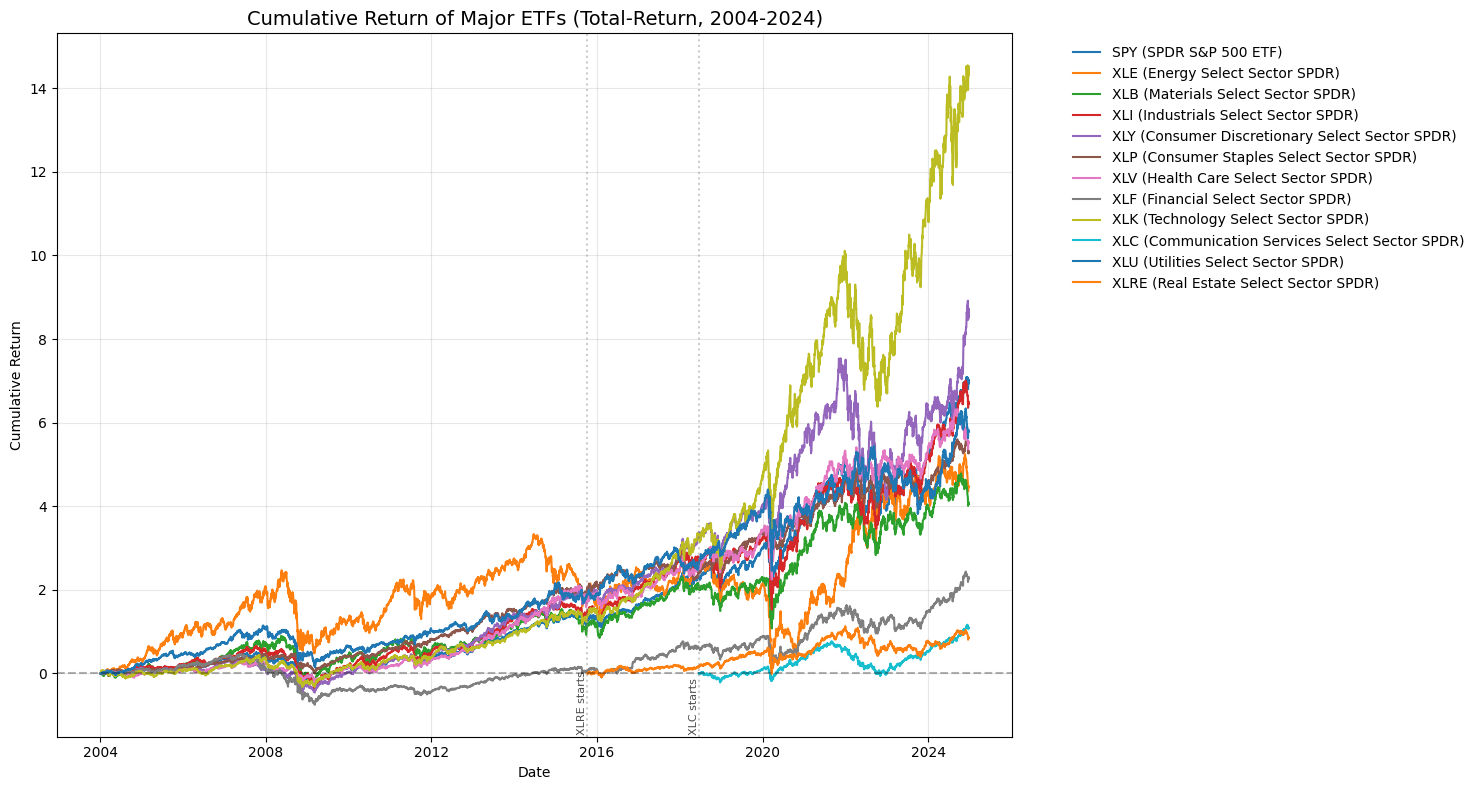

,Ticker,Name,Total Return (%),Annualized Return (%),Start,End,Years
0,SPY,SPDR S&P 500 ETF,694.35,10.38,2004-01-02,2024-12-27,20.99
1,XLE,Energy Select Sector SPDR,447.89,8.44,2004-01-02,2024-12-27,20.99
2,XLB,Materials Select Sector SPDR,405.87,8.03,2004-01-02,2024-12-27,20.99
3,XLI,Industrials Select Sector SPDR,644.68,10.04,2004-01-02,2024-12-27,20.99
4,XLY,Consumer Discretionary Select Sector SPDR,853.40,11.34,2004-01-02,2024-12-27,20.99
5,XLP,Consumer Staples Select Sector SPDR,529.32,9.16,2004-01-02,2024-12-27,20.99
6,XLV,Health Care Select Sector SPDR,552.14,9.35,2004-01-02,2024-12-27,20.99
7,XLF,Financial Select Sector SPDR,227.79,5.82,2004-01-02,2024-12-27,20.99
8,XLK,Technology Select Sector SPDR,1431.80,13.89,2004-01-02,2024-12-27,20.99
9,XLC,Communication Services Select Sector SPDR,108.68,11.94,2018-06-19,2024-12-27,6.52


In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# ticker: descriptive name
etf_info = {
    "SPY":  "SPDR S&P 500 ETF",
    "XLE":  "Energy Select Sector SPDR",
    "XLB":  "Materials Select Sector SPDR",
    "XLI":  "Industrials Select Sector SPDR",
    "XLY":  "Consumer Discretionary Select Sector SPDR",
    "XLP":  "Consumer Staples Select Sector SPDR",
    "XLV":  "Health Care Select Sector SPDR",
    "XLF":  "Financial Select Sector SPDR",
    "XLK":  "Technology Select Sector SPDR",
    "XLC":  "Communication Services Select Sector SPDR",
    "XLU":  "Utilities Select Sector SPDR",
    "XLRE": "Real Estate Select Sector SPDR",
}

start_date = "2004-01-01"
end_date   = "2024-12-29"

tickers = list(etf_info.keys())

# auto_adjust=True gives total-return series (price plus dividends)
price_df = yf.download(
    tickers,
    start=start_date,
    end=end_date,
    auto_adjust=True,
    progress=False
)["Close"]

plt.figure(figsize=(15, 8))
results = []

for tk in tickers:
    s = price_df[tk].dropna()
    if s.empty:
        continue

    first, last = float(s.iloc[0]), float(s.iloc[-1])
    years = (s.index[-1] - s.index[0]).days / 365.25
    total_return = last / first - 1
    annualized   = (last / first) ** (1 / years) - 1

    results.append(
        {
            "Ticker": tk,
            "Name": etf_info[tk],
            "Total Return (%)": f"{total_return*100:.2f}",
            "Annualized Return (%)": f"{annualized*100:.2f}",
            "Start": s.index[0].date(),
            "End": s.index[-1].date(),
            "Years": f"{years:.2f}",
        }
    )

    cumulative = s / first - 1
    plt.plot(cumulative.index, cumulative.values, label=f"{tk} ({etf_info[tk]})")

# mark late-launch funds for context
for late_tk in ["XLRE", "XLC"]:
    if late_tk in price_df:
        launch_date = price_df[late_tk].first_valid_index()
        if launch_date is not None:
            plt.axvline(launch_date, color="grey", linestyle=":", alpha=0.4)
            plt.text(
                launch_date,
                plt.ylim()[0] + 0.05,
                f"{late_tk} starts",
                rotation=90,
                va="bottom",
                ha="right",
                fontsize=8,
                alpha=0.7,
            )

plt.axhline(0, color="black", linestyle="--", alpha=0.3)
plt.title("Cumulative Return of Major ETFs (Total-Return, 2004-2024)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True, alpha=0.3)
plt.legend(framealpha=0.0, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

summary_df = pd.DataFrame(results)
summary_df


# Risk adjusted returns metrics

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import jarque_bera

# your ETF list
etf_info = {
    "SPY":  "SPDR S&P 500 ETF",
    "XLE":  "Energy Select Sector SPDR",
    "XLB":  "Materials Select Sector SPDR",
    "XLI":  "Industrials Select Sector SPDR",
    "XLY":  "Consumer Discretionary Select Sector SPDR",
    "XLP":  "Consumer Staples Select Sector SPDR",
    "XLV":  "Health Care Select Sector SPDR",
    "XLF":  "Financial Select Sector SPDR",
    "XLK":  "Technology Select Sector SPDR",
    "XLC":  "Communication Services Select Sector SPDR",
    "XLU":  "Utilities Select Sector SPDR",
    "XLRE": "Real Estate Select Sector SPDR",
}

tickers    = list(etf_info.keys())
start_date = "2004-01-01"
end_date   = "2024-12-29"
benchmark  = "SPY"

# download total-return (price plus dividends) series
price_df = yf.download(
    tickers,
    start = start_date,
    end   = end_date,
    auto_adjust = True,
    progress=False
)["Close"]

def compute_risk_metrics(asset_prices, bench_prices, risk_free_rate=0.01):
    # daily returns
    r_a = asset_prices.pct_change().dropna()
    r_b = bench_prices.pct_change().dropna()
    df = pd.concat([r_a, r_b], axis=1).dropna()
    df.columns = ["asset","bench"]

    # risk free daily
    rf_daily = risk_free_rate / 252
    excess = df["asset"] - rf_daily
    ann = np.sqrt(252)

    # Sharpe
    sharpe = ann * excess.mean() / excess.std()
    # Sortino
    down = excess[excess<0]
    sortino = ann * excess.mean() / down.std()
    # Beta and Treynor
    cov_ab = np.cov(df["asset"], df["bench"])[0,1]
    beta  = cov_ab / df["bench"].var()
    treynor = ann * (df["asset"].mean() - rf_daily) / beta
    # Jensen alpha
    rm_rf = df["bench"] - rf_daily
    jensen = ann * (df["asset"].mean() - (rf_daily + beta * rm_rf.mean()))
    # Information ratio
    active = df["asset"] - df["bench"]
    info   = ann * active.mean() / active.std()
    # Calmar (max drawdown)
    cumret  = (1+df["asset"]).cumprod()
    drawdown= cumret.div(cumret.cummax()) - 1
    maxdd   = drawdown.min()
    calmar  = ann * df["asset"].mean() / abs(maxdd)
    # Omega (threshold zero)
    gains   = df["asset"][df["asset"]>=0].sum()
    losses  = -df["asset"][df["asset"]<0].sum()
    omega   = gains / losses

    # Assumption checks
    jb_stat, jb_p = jarque_bera(df["asset"])
    skew   = df["asset"].skew()
    kurt   = df["asset"].kurtosis()
    # Rolling beta stability
    roll_cov = df["asset"].rolling(60).cov(df["bench"])
    roll_var = df["bench"].rolling(60).var()
    rbeta    = roll_cov.div(roll_var)

    return pd.Series({
        "Sharpe":        sharpe,
        "Sortino":       sortino,
        "Treynor":       treynor,
        "JensenAlpha":   jensen,
        "InfoRatio":     info,
        "MaxDrawdown":   maxdd,
        "Calmar":        calmar,
        "Omega":         omega,
        "JB_pvalue":     jb_p,
        "Skew":          skew,
        "Kurtosis":      kurt,
        "RollingBetaStd": rbeta.std()
    })

# build a DataFrame of metrics
rows = []
for tk in tickers:
    if tk == benchmark:
        continue
    s_a = price_df[tk].dropna()
    s_b = price_df[benchmark].reindex(s_a.index).dropna()
    if len(s_a)<252:
        continue  # skip short series
    metrics = compute_risk_metrics(s_a, s_b)
    metrics.name = tk
    rows.append(metrics)

metrics_df = pd.DataFrame(rows)

# display in Jupyter or print
pd.set_option("display.float_format", "{:.3f}".format)
print(metrics_df)


      Sharpe  Sortino  Treynor  JensenAlpha  InfoRatio  MaxDrawdown  Calmar  \
XLE    0.389    0.507    0.006       -0.000      0.044       -0.713   0.011   
XLB    0.407    0.536    0.006       -0.001     -0.102       -0.598   0.011   
XLI    0.519    0.666    0.007        0.000      0.008       -0.623   0.012   
XLY    0.561    0.718    0.007        0.001      0.150       -0.590   0.014   
XLP    0.628    0.821    0.010        0.002     -0.158       -0.324   0.019   
XLV    0.565    0.745    0.008        0.001     -0.123       -0.392   0.017   
XLF    0.306    0.384    0.004       -0.003     -0.107       -0.827   0.008   
XLK    0.658    0.861    0.009        0.002      0.414       -0.530   0.018   
XLC    0.561    0.729    0.008       -0.001     -0.122       -0.467   0.019   
XLU    0.532    0.700    0.010        0.002     -0.051       -0.465   0.015   
XLRE   0.377    0.473    0.006       -0.003     -0.420       -0.388   0.014   

      Omega  JB_pvalue   Skew  Kurtosis  RollingBet

In [24]:
# after metrics_df is built…

# Interpretation thresholds
jb_thresh       = 0.05
beta_std_thresh = metrics_df['RollingBetaStd'].quantile(0.75)  # for example top 25% as “large”
upside_ratio    = metrics_df['Sortino'] / metrics_df['Sharpe']

for ticker, row in metrics_df.iterrows():
    print(f"\n=== {ticker} ===")
    # 1. Normality check
    if row['JB_pvalue'] < jb_thresh:
        print("JB p-value below 0.05: returns deviate from normality; lean on Sortino, Calmar or Omega rather than Sharpe")
    else:
        print("JB p-value OK: Sharpe’s normality assumption holds reasonably well")

    # 2. Beta stability
    if row['RollingBetaStd'] > beta_std_thresh:
        print("RollingBetaStd is large: β is unstable; Treynor and Jensen’s α may be unreliable")
    else:
        print("β stability OK: Treynor and Jensen’s α assumptions hold")

    # 3. Upside vs downside risk
    if upside_ratio[ticker] > 1.2:  # choose a cutoff, e.g. Sortino at least 20% above Sharpe
        print("Sortino far exceeds Sharpe: strong upside volatility; rely on a downside-focused metric")
    else:
        print("Sortino vs Sharpe within 20%: no extreme upside skew")

    # (Optional) you can highlight any extreme Calmar or Omega oddities here…



=== XLE ===
JB p-value below 0.05: returns deviate from normality; lean on Sortino, Calmar or Omega rather than Sharpe
RollingBetaStd is large: β is unstable; Treynor and Jensen’s α may be unreliable
Sortino far exceeds Sharpe: strong upside volatility; rely on a downside-focused metric

=== XLB ===
JB p-value below 0.05: returns deviate from normality; lean on Sortino, Calmar or Omega rather than Sharpe
β stability OK: Treynor and Jensen’s α assumptions hold
Sortino far exceeds Sharpe: strong upside volatility; rely on a downside-focused metric

=== XLI ===
JB p-value below 0.05: returns deviate from normality; lean on Sortino, Calmar or Omega rather than Sharpe
β stability OK: Treynor and Jensen’s α assumptions hold
Sortino far exceeds Sharpe: strong upside volatility; rely on a downside-focused metric

=== XLY ===
JB p-value below 0.05: returns deviate from normality; lean on Sortino, Calmar or Omega rather than Sharpe
β stability OK: Treynor and Jensen’s α assumptions hold
Sortino

#